## Setup

In [1]:
import os
drive_dir = '/content/drive/MyDrive/ITMO_HW/GenSpeech/Group HW1'
os.chdir(drive_dir)

In [2]:
!pip install --quiet nemo_text_processing audiomentations

In [ ]:
!gdown --id 15CpIWvVDA6mOlPxyI4-vicyXSqd-EcIb -O train.tar.gz

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=15CpIWvVDA6mOlPxyI4-vicyXSqd-EcIb
From (redirected): https://drive.google.com/uc?id=15CpIWvVDA6mOlPxyI4-vicyXSqd-EcIb&confirm=t&uuid=42acd205-805a-486c-9fc9-9416d6027377
To: /content/drive/MyDrive/ITMO_HW/GenSpeech/Group HW1/train.tar.gz
100% 1.45G/1.45G [00:25<00:00, 57.9MB/s]


In [ ]:
!gdown --id 1Jlw09RSJjhJTxdN3VQj5Bph4zRNwOqSL -O dev.tar.gz

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Jlw09RSJjhJTxdN3VQj5Bph4zRNwOqSL
From (redirected): https://drive.google.com/uc?id=1Jlw09RSJjhJTxdN3VQj5Bph4zRNwOqSL&confirm=t&uuid=ae11a8ba-1bc4-43c3-abf5-6259527118b8
To: /content/drive/MyDrive/ITMO_HW/GenSpeech/Group HW1/dev.tar.gz
100% 145M/145M [00:00<00:00, 227MB/s]


In [ ]:
!mkdir -p train dev
!tar -xzf train.tar.gz -C train
!tar -xzf dev.tar.gz -C dev

In [ ]:
!ls -lh train | head
!ls -lh dev | head

total 619K
drwx------ 2 root root 4.0K Apr  1 15:24 train
-rw------- 1 root root 615K Apr  1 15:25 train.csv
total 110K
drwx------ 2 root root 4.0K May  3 14:53 dev
-rw------- 1 root root 106K Apr  8 07:29 dev.csv


## Let's examine the data

In [ ]:
import os
import pandas as pd
from IPython.display import Audio, display
import torchaudio
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

train_df = pd.read_csv('train/train.csv')
dev_df = pd.read_csv('dev/dev.csv')

print('Train speakers:', train_df['spk_id'].nunique())
print(train_df['spk_id'].value_counts().sort_index())
print('\n\n')
print('Dev speakers:', dev_df['spk_id'].nunique())
print(dev_df['spk_id'].value_counts().sort_index())
print('\n\n')

for row in train_df.sample(3, random_state=42).itertuples():
    audio_path = os.path.join('train', row.filename)
    print(audio_path, row.transcription, row.spk_id)
    display(Audio(filename=audio_path, rate=row.samplerate))

Train speakers: 6
spk_id
spk_A    1066
spk_B    2914
spk_C    1063
spk_D     913
spk_E    5686
spk_F     911
Name: count, dtype: int64



Dev speakers: 10
spk_id
spk_A    100
spk_B    100
spk_C    100
spk_D    100
spk_E    100
spk_F    100
spk_H    633
spk_I    497
spk_J    344
spk_K    191
Name: count, dtype: int64



train/train/b970d7e2ee.wav 683114 spk_D


train/train/9cc5cc263e.wav 429202 spk_B


train/train/e3c8c1a227.wav 354210 spk_F


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

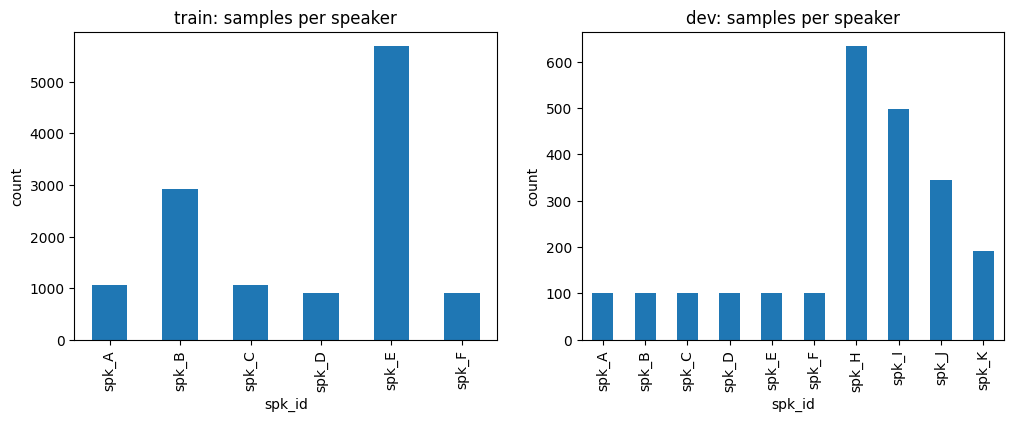

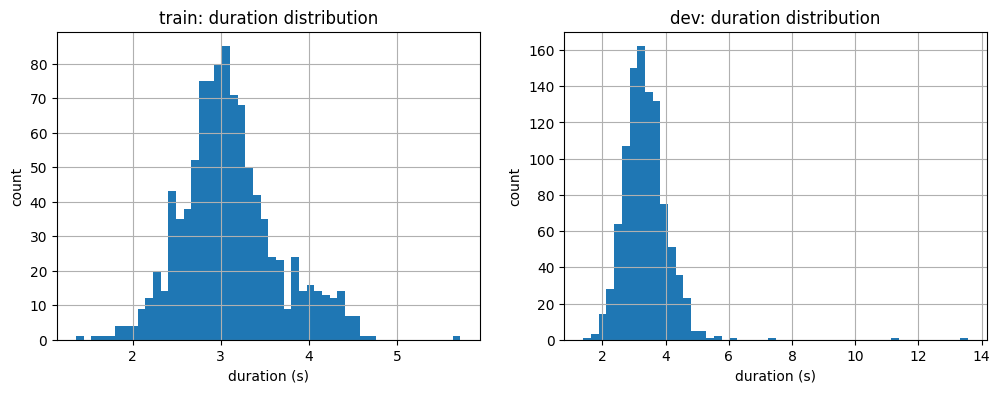

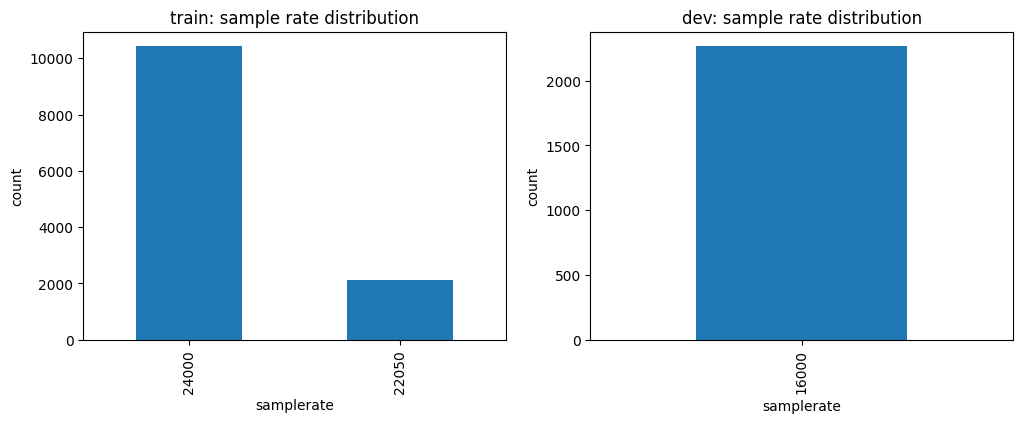

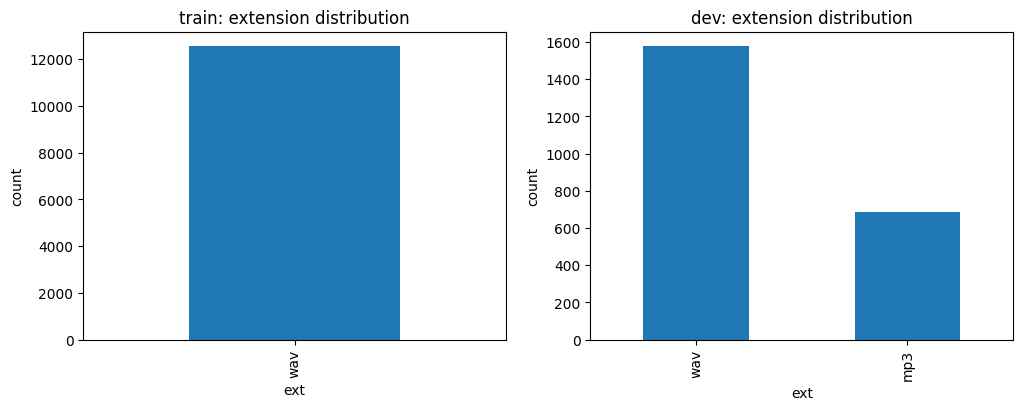

In [ ]:
tqdm.pandas()

N_samples = 1000


train_df['path'] = train_df['filename'].apply(lambda f: os.path.join('train', f))
dev_df['path'] = dev_df['filename'].apply(lambda f: os.path.join('dev', f))

train_sample = train_df.sample(N_samples, random_state=42) if N_samples else train_df
dev_sample = dev_df.sample(N_samples, random_state=42) if N_samples else dev_df

train_sample['duration'] = train_sample['path'].progress_apply(
    lambda p: torchaudio.info(p).num_frames / torchaudio.info(p).sample_rate
)
dev_sample['duration'] = dev_sample['path'].progress_apply(
    lambda p: torchaudio.info(p).num_frames / torchaudio.info(p).sample_rate
)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
train_df['spk_id'].value_counts().sort_index().plot.bar(ax=axes[0])
axes[0].set_title('train: samples per speaker')
axes[0].set_xlabel('spk_id')
axes[0].set_ylabel('count')
dev_df['spk_id'].value_counts().sort_index().plot.bar(ax=axes[1])
axes[1].set_title('dev: samples per speaker')
axes[1].set_xlabel('spk_id')
axes[1].set_ylabel('count')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
train_sample['duration'].hist(bins=50, ax=axes[0])
axes[0].set_title('train: duration distribution')
axes[0].set_xlabel('duration (s)')
axes[0].set_ylabel('count')
dev_sample['duration'].hist(bins=50, ax=axes[1])
axes[1].set_title('dev: duration distribution')
axes[1].set_xlabel('duration (s)')
axes[1].set_ylabel('count')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
train_df['samplerate'].value_counts().plot.bar(ax=axes[0])
axes[0].set_title('train: sample rate distribution')
axes[0].set_xlabel('samplerate')
axes[0].set_ylabel('count')
dev_df['samplerate'].value_counts().plot.bar(ax=axes[1])
axes[1].set_title('dev: sample rate distribution')
axes[1].set_xlabel('samplerate')
axes[1].set_ylabel('count')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
train_df['ext'].value_counts().plot.bar(ax=axes[0])
axes[0].set_title('train: extension distribution')
axes[0].set_xlabel('ext')
axes[0].set_ylabel('count')
dev_df['ext'].value_counts().plot.bar(ax=axes[1])
axes[1].set_title('dev: extension distribution')
axes[1].set_xlabel('ext')
axes[1].set_ylabel('count')
plt.show()

## Text normalization and inverse normalization

In [ ]:
from nemo_text_processing.text_normalization.normalize import Normalizer
from nemo_text_processing.inverse_text_normalization.inverse_normalize import InverseNormalizer

In [ ]:
normalizer = Normalizer(input_case='cased', lang='ru', deterministic=False)
inverse_normalizer = InverseNormalizer(lang='ru')

test_transcripts = train_df['transcription'].astype(str).sample(10, random_state=42).tolist()
for ex in test_transcripts:
    norm = normalizer.normalize(ex, punct_post_process=True)
    inv = inverse_normalizer.inverse_normalize(norm, verbose=False)
    if inv != ex:
        print(f"Mismatch: {ex} -> {norm} -> {inv}")

 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars. This might take some time...
INFO:NeMo-text-processing:Creating ClassifyFst grammars. This might take some time...
 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars. This might take some time...
INFO:NeMo-text-processing:Creating ClassifyFst grammars. This might take some time...
 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars. This might take some time...
INFO:NeMo-text-processing:Creating ClassifyFst grammars. This might take some time...
 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "тысяч" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "тысяч" } }
 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "1000" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "1000" } }
 NeMo-text-processing :: DEBUG    :: tokens { ordinal { integer: "двадцать тысяч трехтысячных" } }
DEBUG:NeMo-text-processing:tokens { ordinal { integer: "двадца

1000 -> тысяч -> 1000
23000 -> двадцать тысяч трехтысячных -> 23000


 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "сто тридцать девять тысяч четыреста семьдесят три" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "сто тридцать девять тысяч четыреста семьдесят три" } }
 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "139473" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "139473" } }
 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "девятьсот девяносто девять тысяч девятьсот девяносто девять" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "девятьсот девяносто девять тысяч девятьсот девяносто девять" } }
 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "999999" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "999999" } }


139473 -> сто тридцать девять тысяч четыреста семьдесят три -> 139473
999999 -> девятьсот девяносто девять тысяч девятьсот девяносто девять -> 999999


 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "тысяч одна" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "тысяч одна" } }
 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "1001" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "1001" } }
 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "две тысяч пять" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "две тысяч пять" } }
 NeMo-text-processing :: DEBUG    :: tokens { cardinal { integer: "2005" } }
DEBUG:NeMo-text-processing:tokens { cardinal { integer: "2005" } }


1001 -> тысяч одна -> 1001
2005 -> две тысяч пять -> 2005


In [ ]:
def normalize_dataframe(df: pd.DataFrame, normalizer: Normalizer) -> pd.DataFrame:
    df['normalized_transcription'] = df['transcription'].progress_apply(
        lambda x: normalizer.normalize(str(x), punct_post_process=True)
    )
    return df


train_df = normalize_dataframe(train_df, normalizer)
dev_df = normalize_dataframe(dev_df, normalizer)

train_df.to_csv('train_normalized.csv', index=False)
dev_df.to_csv('dev_normalized.csv', index=False)

## Data handling and augmentations

In [1]:
import os
import random
import math
from collections import defaultdict, Counter
import time

import pandas as pd
import numpy as np
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader, Sampler
from tqdm import tqdm
from audiomentations import Compose, AddGaussianNoise, PitchShift, TimeStretch

In [2]:
cfg = dict(
    run_name = f"qnet_{time.strftime('%Y%m%d_%H%M%S')}",
    epochs = 20,
    batch_size = 16,
    lr = 1e-3,
    weight_decay = 1e-5,
    grad_clip = 5.0,
    patience = 5,
    save_dir = "./checkpoints_qnet",
    save_every_ep = 5,
    dropout = 0.2,
)

In [3]:
BASE_DIR = ''
TRAIN_CSV = os.path.join(BASE_DIR, "train", "train_normalized.csv")
DEV_CSV = os.path.join(BASE_DIR, "dev",   "dev_normalized.csv")
TRAIN_AUDIO_ROOT = os.path.join(BASE_DIR, "train")
DEV_AUDIO_ROOT = os.path.join(BASE_DIR, "dev")

In [4]:
class CharTokenizer:
    BLANK_TOKEN = "<BLANK>"

    def __init__(self, transcripts):
        chars = sorted({c for t in transcripts for c in t})
        self.idx2char = [self.BLANK_TOKEN] + chars
        self.char2idx = {c: i + 1 for i, c in enumerate(chars)}

    def encode(self, text):
        return [self.char2idx[c] for c in text]

    def decode(self, idxs, collapse_repeats=False, remove_blanks=True):
        out, prev = [], None
        for i in idxs:
            if remove_blanks and i == 0:
                continue
            if collapse_repeats and prev == i:
                continue
            out.append(self.idx2char[i])
            prev = i
        return "".join(out)

In [5]:
SAMPLE_RATE = 16_000
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
mel_spec = torchaudio.transforms.MelSpectrogram(
    sample_rate=SAMPLE_RATE,
    n_fft=400,
    hop_length=160,
    n_mels=80,
    f_min=50,
    f_max=7_600,
)
to_db = torchaudio.transforms.AmplitudeToDB(top_db=80)

In [ ]:
def waveform_to_fbank(wave):
    with torch.no_grad():
        fb = to_db(mel_spec(wave))
    return fb

In [7]:
class SpecAugment(torch.nn.Module):
    def __init__(self, time_mask=20, freq_mask=10, num_masks=2):
        super().__init__()
        self.t_mask = torchaudio.transforms.TimeMasking(time_mask)
        self.f_mask = torchaudio.transforms.FrequencyMasking(freq_mask)
        self.num = num_masks

    def forward(self, x):
        for _ in range(self.num):
            x = self.t_mask(x)
            x = self.f_mask(x)
        return x

spec_aug = SpecAugment()

In [ ]:
class NumbersDataset(Dataset):
    def __init__(
        self,
        csv_path,
        audio_root,
        tokenizer: CharTokenizer,
        sample_rate=SAMPLE_RATE,
        train=True,
    ):
        self.df = pd.read_csv(csv_path)
        self.audio_root = audio_root
        self.tokenizer = tokenizer
        self.sample_rate = sample_rate
        self.train = train
        self.resampler_cache = {}
        if self.train:
            self.time_domain_augmenter = Compose([
                AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.3),
                PitchShift(min_semitones=-2, max_semitones=2, p=0.3),
                TimeStretch(min_rate=0.8, max_rate=1.2, p=0.3, leave_length_unchanged=False)
            ])


    def _resample(self, wave, sr):
        if sr == self.sample_rate:
            return wave
        if sr not in self.resampler_cache:
            self.resampler_cache[sr] = torchaudio.transforms.Resample(
                orig_freq=sr, new_freq=self.sample_rate
            )
        return self.resampler_cache[sr](wave)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        rel_path = row["filename"]
        path = os.path.join(self.audio_root, rel_path)
        wave, sr = torchaudio.load(path)
        wave = self._resample(wave, sr)

        if self.train:
            wave_np = wave.squeeze(0).numpy()
            augmented_samples = self.time_domain_augmenter(samples=wave_np, sample_rate=self.sample_rate)
            wave = torch.from_numpy(augmented_samples).unsqueeze(0).to(wave.dtype)


        feat = waveform_to_fbank(wave)
        if self.train:
            feat = spec_aug(feat)

        feat = feat.squeeze(0).transpose(0, 1)

        label = torch.tensor(
            self.tokenizer.encode(row["normalized_transcription"]),
            dtype=torch.long,
        )

        return {
            "feats": feat,
            "feat_len": feat.shape[0],
            "labels": label,
            "label_len": len(label),
            "speaker": row["spk_id"],
        }

In [9]:
def pad_seq(seq_list, pad_val=0):
    lengths = [s.shape[0] for s in seq_list]
    max_len = max(lengths)
    out_dims = (len(seq_list), max_len, *seq_list[0].shape[1:])
    out = seq_list[0].new_full(out_dims, pad_val)
    for i, s in enumerate(seq_list):
        out[i, : s.shape[0]] = s
    return out, torch.tensor(lengths, dtype=torch.long)

def collate_fn(batch):
    feats, labels = [], []
    speakers = []
    for b in batch:
        feats.append(b["feats"])
        labels.append(b["labels"])
        speakers.append(b["speaker"])

    feats, feat_lens = pad_seq(feats, pad_val=0)
    labels, label_lens = pad_seq(labels, pad_val=0)

    return {
        "feats": feats,
        "feat_lens": feat_lens,
        "labels": labels,
        "label_lens": label_lens,
        "speakers": speakers
    }

In [ ]:
def create_dataloaders(
    train_csv, dev_csv,
    train_audio_root, dev_audio_root,
    batch_size=16, num_workers=2, prefetch_factor=4
):
    train_df = pd.read_csv(train_csv)
    tokenizer = CharTokenizer(train_df["normalized_transcription"])

    train_set = NumbersDataset(
        train_csv, train_audio_root, tokenizer, train=True
    )
    dev_set = NumbersDataset(
        dev_csv, dev_audio_root, tokenizer, train=False
    )

    train_loader = DataLoader(
        train_set, batch_size=batch_size, shuffle=True,
        num_workers=num_workers, collate_fn=collate_fn,
        pin_memory=True, prefetch_factor=prefetch_factor
    )
    dev_loader = DataLoader(
        dev_set, batch_size=batch_size, shuffle=False,
        num_workers=num_workers, collate_fn=collate_fn,
        pin_memory=True, prefetch_factor=prefetch_factor
    )
    return train_loader, dev_loader, tokenizer

In [11]:
train_loader, dev_loader, tokenizer = create_dataloaders(
    train_csv=TRAIN_CSV,
    dev_csv=DEV_CSV,
    train_audio_root=TRAIN_AUDIO_ROOT,
    dev_audio_root=DEV_AUDIO_ROOT,
    batch_size=cfg['batch_size'],
    num_workers=8, prefetch_factor=4
)

print(f"Tokenizer size : {len(tokenizer.idx2char)} symbols")
print(f"Train batches : {len(train_loader)}")
print(f"Dev batches : {len(dev_loader)}")

Tokenizer size : 22 symbols
Train batches : 785
Dev batches : 142


## Main training loop

In [12]:
import os, time, math, logging, datetime, shutil
from pathlib import Path

import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils import clip_grad_norm_
from torchmetrics.text import CharErrorRate

/home/aleksanderk/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
import wandb

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [14]:
class SeparableConv1d(nn.Module):
    def __init__(self, in_ch, out_ch, kernel, stride=1, dilation=1, dropout=0.2):
        super().__init__()
        padding = (kernel // 2) * dilation
        self.depthwise = nn.Conv1d(
            in_ch, in_ch, kernel_size=kernel, stride=stride,
            padding=padding, dilation=dilation, groups=in_ch, bias=False
        )
        self.pointwise = nn.Conv1d(in_ch, out_ch, kernel_size=1, bias=False)
        self.bn = nn.BatchNorm1d(out_ch)
        self.act = nn.ReLU()
        self.drop = nn.Dropout(dropout)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.bn(x)
        x = self.act(x)
        return self.drop(x)

In [15]:
class QuartzNetBlock(nn.Module):
    def __init__(self, ch, kernel, repeats, dropout):
        super().__init__()
        layers = []
        for _ in range(repeats):
            layers.append(SeparableConv1d(ch, ch, kernel, dropout=dropout))
        self.body = nn.Sequential(*layers)

    def forward(self, x):
        return x + self.body(x)

In [16]:
class QuartzNetSmallCTC(nn.Module):
    def __init__(self, vocab_size, in_feats=80, channels=128, dropout=0.2):
        super().__init__()
        self.input = nn.Sequential(
            nn.Conv1d(in_feats, channels, kernel_size=11, padding=11//2, bias=False),
            nn.BatchNorm1d(channels),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        blocks = []
        for _ in range(5):
            blocks.append(QuartzNetBlock(channels, kernel=11, repeats=5, dropout=dropout))
        self.blocks = nn.Sequential(*blocks)

        self.final = SeparableConv1d(channels, channels*2, kernel=29, dropout=dropout)
        self.classifier = nn.Conv1d(channels*2, vocab_size, kernel_size=1)

        self.log_softmax = nn.LogSoftmax(dim=-1)

    def forward(self, feats, feat_lens):
        x = feats.transpose(1, 2)
        x = self.input(x)
        x = self.blocks(x)
        x = self.final(x)
        logits = self.classifier(x)
        logp = self.log_softmax(logits.transpose(1, 2))
        return logp.transpose(0, 1)

In [20]:
Path(cfg["save_dir"]).mkdir(exist_ok=True, parents=True)

In [21]:
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[logging.StreamHandler()],
)
logger = logging.getLogger()

In [22]:
vocab_size = len(tokenizer.idx2char)

In [23]:
model = QuartzNetSmallCTC(
    vocab_size=vocab_size,
    in_feats=80,
    channels=384,
    dropout=cfg["dropout"],
).to(DEVICE)

In [24]:
param_millions = sum(p.numel() for p in model.parameters()) / 1e6
logger.info(f"QuartzNetSmall params: {param_millions:.2f} M (≤5 M)")
print(f"QuartzNetSmall params: {param_millions:.2f} M (≤5 M)")

2025-05-07 23:47:43,843 [INFO] QuartzNetSmall params: 4.47 M (≤5 M)


QuartzNetSmall params: 4.47 M (≤5 M)


In [25]:
criterion = nn.CTCLoss(blank=0, zero_infinity=True)
optimizer = optim.AdamW(
    model.parameters(),
    lr=cfg["lr"],
    weight_decay=cfg["weight_decay"],
)
scheduler = optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=cfg["epochs"] * len(train_loader)
)

In [26]:
wandb.init(project="russian_numbers_asr",
           name=cfg["run_name"],
           config=cfg)

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /home/aleksanderk/.netrc
wandb: Currently logged in as: aleksanderk (null-team) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [26]:
def greedy_decode(log_probs):
    tokens = log_probs.argmax(-1).transpose(0, 1)
    return [
        tokenizer.decode(seq.cpu().numpy(),
                         collapse_repeats=True,
                         remove_blanks=True)
        for seq in tokens
    ]

In [28]:
import torch
from tqdm.auto import tqdm
from collections import defaultdict
from torchmetrics.text import CharErrorRate

def run_epoch(model, loader, train: bool = True):
    model.train() if train else model.eval()

    total_loss = 0.0
    overall_cer = CharErrorRate()
    spk_cer = defaultdict(CharErrorRate)

    bar = tqdm(loader, desc=("Train" if train else "Eval"), leave=False)

    for batch in bar:
        feats = batch["feats"].to(DEVICE, non_blocking=True)
        feat_lens = batch["feat_lens"].to(DEVICE, non_blocking=True)
        labels = batch["labels"].to(DEVICE, non_blocking=True)
        label_lens = batch["label_lens"].to(DEVICE, non_blocking=True)
        speakers = batch["speakers"]

        ctx = torch.enable_grad() if train else torch.no_grad()
        with ctx:
            logp = model(feats, feat_lens)
            loss = criterion(logp, labels, feat_lens, label_lens)

        if train:
            optimizer.zero_grad(set_to_none=True)
            loss.backward()
            clip_grad_norm_(model.parameters(), cfg["grad_clip"])
            optimizer.step()
            scheduler.step()

        total_loss += loss.item() * feats.size(0)

        with torch.no_grad():
            preds = greedy_decode(logp)
            refs  = [
                tokenizer.decode(
                    l[:l_len].cpu().numpy(),
                    collapse_repeats=False,
                    remove_blanks=False,
                )
                for l, l_len in zip(labels, label_lens)
            ]
            overall_cer.update(preds, refs)
            for p, r, spk in zip(preds, refs, speakers):
                spk_cer[spk].update([p], [r])

        bar.set_postfix({"loss": loss.item()})

    avg_loss = total_loss / len(loader.dataset)
    cer_val  = overall_cer.compute().item()
    per_spk  = {s: m.compute().item() for s, m in spk_cer.items()}

    logger.info(
        f"{'Train' if train else 'Eval'} epoch finished "
        f"(avg_loss={avg_loss:.4f}, CER={cer_val:.4f})"
    )
    return avg_loss, cer_val, per_spk



In [29]:
best_dev_cer, epochs_no_improve = float("inf"), 0

for epoch in range(1, cfg["epochs"] + 1):
    t0 = time.time()
    tr_loss, tr_cer, tr_spk = run_epoch(model, train_loader, train=True)
    dv_loss, dv_cer, dv_spk = run_epoch(model, dev_loader,   train=False)

    logger.info(
        f"Ep{epoch:02d}  "
        f"train_loss={tr_loss:.4f}  train_CER={tr_cer:.4f} | "
        f"dev_loss={dv_loss:.4f}    dev_CER={dv_cer:.4f}   "
        f"[{time.time()-t0:.0f}s]"
    )

    log_dict = {
        "epoch": epoch,
        "train_loss": tr_loss, "train_CER": tr_cer,
        "dev_loss": dv_loss,   "dev_CER": dv_cer,
        "lr": optimizer.param_groups[0]["lr"],
    }
    log_dict.update({f"train_CER_{s}": v for s, v in tr_spk.items()})
    log_dict.update({f"dev_CER_{s}":   v for s, v in dv_spk.items()})
    wandb.log(log_dict)

    if epoch % cfg["save_every_ep"] == 0:
        torch.save({"model": model.state_dict(), "epoch": epoch},
                   Path(cfg["save_dir"])/f"epoch_{epoch:02d}.pt")

    if dv_cer < best_dev_cer:
        best_dev_cer = dv_cer
        epochs_no_improve = 0
        torch.save({"model": model.state_dict(), "epoch": epoch, "dev_CER": dv_cer},
                   Path(cfg["save_dir"])/"best.pt")
        logger.info(f"  ✓ New best dev CER {dv_cer:.4f}")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= cfg["patience"]:
            logger.info("Early stopping – dev CER stagnated.")
            break

logger.info("Training complete.")
wandb.finish()

2025-05-07 23:27:15,885 [INFO] Train epoch finished (avg_loss=0.5818, CER=0.3997)
2025-05-07 23:27:54,022 [INFO] Eval epoch finished (avg_loss=0.4096, CER=0.1634)
2025-05-07 23:27:54,121 [INFO] Ep01  train_loss=0.5818  train_CER=0.3997 | dev_loss=0.4096    dev_CER=0.1634   [277s]
2025-05-07 23:27:54,241 [INFO]   ✓ New best dev CER 0.1634
2025-05-07 23:32:08,395 [INFO] Train epoch finished (avg_loss=0.0651, CER=0.1631)
2025-05-07 23:32:55,247 [INFO] Eval epoch finished (avg_loss=0.3308, CER=0.2312)
2025-05-07 23:32:55,400 [INFO] Ep02  train_loss=0.0651  train_CER=0.1631 | dev_loss=0.3308    dev_CER=0.2312   [301s]
2025-05-07 23:37:34,088 [INFO] Train epoch finished (avg_loss=0.0475, CER=0.0966)
2025-05-07 23:38:22,288 [INFO] Eval epoch finished (avg_loss=0.3203, CER=0.1128)
2025-05-07 23:38:22,481 [INFO] Ep03  train_loss=0.0475  train_CER=0.0966 | dev_loss=0.3203    dev_CER=0.1128   [327s]
2025-05-07 23:38:22,670 [INFO]   ✓ New best dev CER 0.1128
2025-05-07 23:42:02,415 [INFO] Train ep

KeyboardInterrupt: 

Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x7f3ec64b98a0>> (for post_run_cell), with arguments args (<ExecutionResult object at 7f3e758bfa60, execution_count=29 error_before_exec=None error_in_exec= info=<ExecutionInfo object at 7f3e758bf3d0, raw_cell="best_dev_cer, epochs_no_improve = float("inf"), 0
.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://wsl%2Bubuntu/home/aleksanderk/ITMO/GenSpeech/Group_HW1/Group_HW1.ipynb#X60sdnNjb2RlLXJlbW90ZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

In [30]:
wandb.finish()

Error in callback <bound method _WandbInit._pre_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x7f3ec64b98a0>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 7f3ff58e2560, raw_cell="wandb.finish()" store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://wsl%2Bubuntu/home/aleksanderk/ITMO/GenSpeech/Group_HW1/Group_HW1.ipynb#X61sdnNjb2RlLXJlbW90ZQ%3D%3D>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

BrokenPipeError: [Errno 32] Broken pipe

Error in callback <bound method _WandbInit._post_run_cell_hook of <wandb.sdk.wandb_init._WandbInit object at 0x7f3ec64b98a0>> (for post_run_cell), with arguments args (<ExecutionResult object at 7f3ff58e1ea0, execution_count=30 error_before_exec=None error_in_exec=[Errno 32] Broken pipe info=<ExecutionInfo object at 7f3ff58e2560, raw_cell="wandb.finish()" store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell://wsl%2Bubuntu/home/aleksanderk/ITMO/GenSpeech/Group_HW1/Group_HW1.ipynb#X61sdnNjb2RlLXJlbW90ZQ%3D%3D> result=None>,),kwargs {}:


BrokenPipeError: [Errno 32] Broken pipe

In [ ]:
import os, time, torch
from pathlib import Path

save_dir = Path("./checkpoints")
save_dir.mkdir(exist_ok=True, parents=True)

timestamp = time.strftime("%Y%m%d_%H%M%S")
ckpt_path = save_dir / f"quartznet_{timestamp}.pt"


checkpoint = {
    "model_state": model.state_dict(),
    "vocab": tokenizer.idx2char,
    "cfg": cfg
}

torch.save(checkpoint, ckpt_path)
print(f"Model saved to: {ckpt_path}")

## Inference on test

In [29]:
BASE_DIR_INFERENCE = ''
TEST_CSV_FILENAME = "test.csv"
TEST_DIR_NAME = ""
TEST_CSV_PATH = os.path.join(BASE_DIR_INFERENCE, TEST_DIR_NAME, TEST_CSV_FILENAME)
TEST_AUDIO_ROOT_PATH = os.path.join(BASE_DIR_INFERENCE, TEST_DIR_NAME)
SUBMISSIONS_DIR = os.path.join(BASE_DIR_INFERENCE, "submissions")

MODEL_CHECKPOINT_PATH_FOR_INFERENCE = "colab_best.pt"

Path(SUBMISSIONS_DIR).mkdir(exist_ok=True, parents=True)

In [30]:
loaded_checkpoint = torch.load(MODEL_CHECKPOINT_PATH_FOR_INFERENCE, map_location=DEVICE)

model_state_dict = loaded_checkpoint['model']

model.load_state_dict(model_state_dict)
model.eval()

test_df = pd.read_csv(TEST_CSV_PATH)

In [31]:
class TestInferenceDataset(Dataset):
    def __init__(
        self,
        csv_path,
        audio_root,
        sample_rate=SAMPLE_RATE,
    ):
        self.df = pd.read_csv(csv_path)
        self.audio_root = audio_root
        self.sample_rate = sample_rate
        self.resampler_cache = {}

    def _resample(self, wave, sr):
        if sr == self.sample_rate:
            return wave
        if sr not in self.resampler_cache:
            self.resampler_cache[sr] = torchaudio.transforms.Resample(
                orig_freq=sr, new_freq=self.sample_rate
            )
        return self.resampler_cache[sr](wave)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        rel_path = row["filename"]
        path = os.path.join(self.audio_root, rel_path)

        try:
            wave, sr = torchaudio.load(path)
        except Exception as e:
            print(f"Error loading audio file {path}: {e}")
            return {
                "feats": torch.empty(0, 80),
                "feat_len": 0,
                "filename": rel_path,
                "error": True
            }


        wave = self._resample(wave, sr)
        feat = waveform_to_fbank(wave)
        feat = feat.squeeze(0).transpose(0, 1)

        return {
            "feats": feat,
            "feat_len": feat.shape[0],
            "filename": rel_path,
            "error": False
        }

def test_collate_fn(batch):
    feats = []
    filenames = []

    valid_batch = [b for b in batch if not b.get("error", False) or b["feat_len"] > 0]
    if not valid_batch:
        return {
            "feats": torch.empty(0),
            "feat_lens": torch.empty(0, dtype=torch.long),
            "filenames": [b["filename"] for b in batch]
        }

    for b in valid_batch:
        feats.append(b["feats"])
        filenames.append(b["filename"])

    padded_feats, feat_lens = pad_seq(feats, pad_val=0)
    all_filenames_in_batch = [b["filename"] for b in batch]


    return {
        "feats": padded_feats,
        "feat_lens": feat_lens,
        "filenames": filenames,
        "all_original_filenames" : all_filenames_in_batch
    }


def create_test_dataloader(test_csv, test_audio_r, batch_s, num_w, prefetch_f):
    dataset = TestInferenceDataset(
        csv_path=test_csv,
        audio_root=test_audio_r,
    )
    dataloader = DataLoader(
        dataset,
        batch_size=batch_s,
        shuffle=False,
        num_workers=num_w,
        collate_fn=test_collate_fn,
        pin_memory=True,
        prefetch_factor=prefetch_f
    )
    return dataloader

In [ ]:
if 'normalized_transcription' not in test_df.columns:
    test_df['normalized_transcription'] = ""
if 'spk_id' not in test_df.columns:
    test_df['spk_id'] = "unknown_speaker"


test_dataset = NumbersDataset(
    csv_path=TEST_CSV_PATH,
    audio_root=TEST_AUDIO_ROOT_PATH,
    tokenizer=tokenizer,
    sample_rate=SAMPLE_RATE,
    train=False
)

test_loader_batch_size = 8
test_loader_num_workers = 4
test_loader_prefetch = 4

test_inference_loader = create_test_dataloader(
    TEST_CSV_PATH,
    TEST_AUDIO_ROOT_PATH,
    batch_s=test_loader_batch_size,
    num_w=test_loader_num_workers,
    prefetch_f=test_loader_prefetch
)

In [33]:
predictions_map = {}

with torch.no_grad():
    for batch in tqdm(test_inference_loader, desc="Running Inference"):
        feats = batch["feats"].to(DEVICE, non_blocking=True)
        feat_lens = batch["feat_lens"].to(DEVICE, non_blocking=True)
        filenames_batch = batch["filenames"]

        log_probs_batch = model(feats, feat_lens)

        predicted_texts_batch = greedy_decode(log_probs_batch)

        for filename, pred_text in zip(filenames_batch, predicted_texts_batch):
            predictions_map[filename] = pred_text

test_df['normalized_transcription'] = test_df['filename'].map(predictions_map)
#test_df['normalized_transcription'].fillna("", inplace=True)

Running Inference: 100%|██████████| 323/323 [00:12<00:00, 25.47it/s]


In [34]:
test_df.to_csv("filled_test.csv", index=False)

In [35]:
from nemo_text_processing.inverse_text_normalization.inverse_normalize import InverseNormalizer
inverse_normalizer = InverseNormalizer(lang='ru')

 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars. This might take some time...
2025-05-07 23:49:10,664 [INFO] Creating ClassifyFst grammars. This might take some time...
 NeMo-text-processing :: INFO     :: Creating ClassifyFst grammars. This might take some time...
2025-05-07 23:49:10,667 [INFO] Creating ClassifyFst grammars. This might take some time...


In [36]:
tqdm.pandas(desc="Inverse Text Normalization Progress")

test_df['transcription'] = test_df['normalized_transcription'].progress_apply(
    lambda x: inverse_normalizer.inverse_normalize(x, verbose=False)
)

submission_filename = "ready_test.csv"
submission_path = os.path.join(SUBMISSIONS_DIR, submission_filename)

test_df.to_csv(submission_path, index=False)
print(f"\nInference process complete. Submission file saved to: {submission_path}")

Inverse Text Normalization Progress: 100%|██████████| 2582/2582 [05:15<00:00,  8.17it/s]


Inference process complete. Submission file saved to: submissions/ready_test.csv


In [42]:
test_df = pd.read_csv("submissions/ready_test.csv")

test_df["transcription"] = (
    test_df["transcription"]
    .astype(str)
    .str.replace(r"\s+", "", regex=True)
)

digit_mask = test_df["transcription"].str.fullmatch(r"\d+")

invalid_pct = 100 * (~digit_mask).mean()
print(f"{invalid_pct:.2f}% of rows contain non-digit characters — they will be cleaned.")

test_df["transcription"] = test_df["transcription"].str.replace(r"\D+", "", regex=True)

empty_mask = test_df["transcription"] == ""
test_df.loc[empty_mask, "transcription"] = "1234"

too_big_mask = test_df["transcription"].str.len() > 18
test_df.loc[too_big_mask, "transcription"] = "1234"

test_df["transcription"] = test_df["transcription"].astype(int)

test_df = test_df.drop(columns=["normalized_transcription", "spk_id", "ext", "samplerate"])

final_path = os.path.join(SUBMISSIONS_DIR, "ready_test_removed.csv")
test_df.to_csv(final_path, index=False)
print(f"\nFinal submission file written to: {final_path}")

41.01% of rows contain non-digit characters — they will be cleaned.

Final submission file written to: submissions/ready_test_removed.csv


In [39]:
test_df

,filename,transcription
0,test/d2440788a9.mp3,1234
1,test/e247dbf761.mp3,207723
2,test/071f4a5be7.mp3,79187
3,test/798bd15db7.mp3,1234
4,test/58c0464ad5.mp3,1234
...,...,...
2577,test/e09cefb462.wav,380817
2578,test/e1ce45e316.wav,504936
2579,test/e234e323ff.wav,1234
2580,test/f09990b654.wav,614895
